In [134]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from PreprocessingFunctions import missing_value_imputation

In [135]:
train = pd.read_excel(r'E:\AI\LibrariesForAI\ExploratoryDataAnalysis\FlightPrice/Data_Train.xlsx')
test = pd.read_excel('Test_set.xlsx') 

In [136]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [137]:
# train.info()

In [138]:
train.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [139]:
# train.Route.value_counts()

In [140]:
# train.Route.nunique()

In [141]:
# train.Total_Stops.nunique()

In [142]:
# train.Total_Stops.unique()        

In [143]:
# duplicate

In [144]:
# airlines
# train.Airline.describe()

In [145]:
# train.Airline.unique()

In [146]:
airlines = train.Airline.value_counts()

In [147]:
#DATE

# train.Date_of_Journey.nunique()

In [148]:
# train.Date_of_Journey

In [149]:
# separate column for date or month  = using split

# train.Date_of_Journey.str.split('/')

In [150]:
train['Date'] = train.Date_of_Journey.str.split('/').str[0]
train['Month'] = train.Date_of_Journey.str.split('/').str[1]
train['Year'] = train.Date_of_Journey.str.split('/').str[2]


train.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019


In [151]:
train.drop('Date_of_Journey',axis=1,inplace=True)
train.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019


In [152]:
# train.info()

In [153]:
train['Date'] = train.Date.astype(int)
train['Month'] = train.Month.astype(int)
train['Year'] = train.Year.astype(int)


train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10683 non-null  object
 5   Arrival_Time     10683 non-null  object
 6   Duration         10683 non-null  object
 7   Total_Stops      10682 non-null  object
 8   Additional_Info  10683 non-null  object
 9   Price            10683 non-null  int64 
 10  Date             10683 non-null  int32 
 11  Month            10683 non-null  int32 
 12  Year             10683 non-null  int32 
dtypes: int32(3), int64(1), object(9)
memory usage: 959.9+ KB


In [154]:
train.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019


In [155]:
# Destination
train.Destination.unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [156]:
train.Destination.value_counts()

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [157]:
# Dep_Time
train['Dep_Time_Hr'] = train.Dep_Time.str.split(':').str[0]
train['Dep_Time_min'] = train.Dep_Time.str.split(':').str[1]
# train.drop('Dep_Time',axis=1)

train.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_Time_Hr,Dep_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019,05,50


In [158]:
train.drop('Dep_Time',axis=1,inplace=True)

In [159]:
# Route




In [160]:
train.head(2)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_Time_Hr,Dep_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,2019,05,50


In [161]:
#Arrival_Time

train.Arrival_Time.nunique()

1343

In [162]:
train.Arrival_Time.head()

0    01:10 22 Mar
1           13:15
2    04:25 10 Jun
3           23:30
4           21:35
Name: Arrival_Time, dtype: object

In [163]:
# train.Arrival_Time = train.Arrival_Time.str.split(' ').str[0]

# or
train.Arrival_Time = train.Arrival_Time.apply(lambda x : x.split(' ')[0])

train.head(2)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_Time_Hr,Dep_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,2019,05,50


In [164]:
train['Arrival_Hr'] = train.Arrival_Time.str.split(':').str[0]
train['Arrival_min'] = train.Arrival_Time.str.split(':').str[1]
train.drop('Arrival_Time',axis=1,inplace=True)



In [165]:
train.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_Time_Hr,Dep_Time_min,Arrival_Hr,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,01,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,05,50,13,15


In [166]:
# Duration           

train.Duration.head()

0    2h 50m
1    7h 25m
2       19h
3    5h 25m
4    4h 45m
Name: Duration, dtype: object

In [167]:
# train.Duration.nunique()

In [168]:
# train.Duration.str.split(' ').str[0]

In [169]:
train['Dur_hr'] = train.Duration.str.split('h').str[0]
# train['Dur_min'] = train.Duration.str.split(' ').str[1].str.split('m').str[0]

#if min is considering, add 0 where there is no minute
train.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_Time_Hr,Dep_Time_min,Arrival_Hr,Arrival_min,Dur_hr
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,01,10,2
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,05,50,13,15,7


In [170]:
train['Dur_hr'].unique()

array(['2', '7', '19', '5', '4', '15', '21', '25', '13', '12', '26', '22',
       '23', '20', '10', '6', '11', '8', '16', '3', '27', '1', '14', '9',
       '18', '17', '24', '30', '28', '29', '37', '34', '38', '35', '36',
       '47', '33', '32', '31', '42', '39', '5m', '41', '40'], dtype=object)

In [171]:
# train['Dur_min'].unique()

In [172]:
# 5m is error

(train['Dur_hr']=='5m').sum()

1

In [173]:
train[train['Dur_hr']=='5m']

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_Time_Hr,Dep_Time_min,Arrival_Hr,Arrival_min,Dur_hr
6474,Air India,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,5m,2 stops,No info,17327,6,3,2019,16,50,16,55,5m


In [174]:
# droping the error row
train.drop((train[train['Dur_hr']=='5m']).index,inplace=True)

In [175]:
(train['Dur_hr']=='5m').sum()

0

In [176]:
train.drop('Duration',axis=1,inplace=True)

In [177]:
train.head(3)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_Time_Hr,Dep_Time_min,Arrival_Hr,Arrival_min,Dur_hr
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2019,22,20,01,10,2
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,2019,05,50,13,15,7
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,2019,09,25,04,25,19


In [178]:
#Total_Stops

# train.Total_Stops.head()

In [179]:
# missing val treatment

missing_value_imputation(train,fill_value=0,fill_type=['mode fill'],columns=['Total_Stops'])

Missing values before Treatment is 
 Airline            0
Source             0
Destination        0
Route              1
Total_Stops        1
Additional_Info    0
Price              0
Date               0
Month              0
Year               0
Dep_Time_Hr        0
Dep_Time_min       0
Arrival_Hr         0
Arrival_min        0
Dur_hr             0
dtype: int64
Missing values After Treatment is 
 Airline            0
Source             0
Destination        0
Route              1
Total_Stops        0
Additional_Info    0
Price              0
Date               0
Month              0
Year               0
Dep_Time_Hr        0
Dep_Time_min       0
Arrival_Hr         0
Arrival_min        0
Dur_hr             0
dtype: int64


,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_Time_Hr,Dep_Time_min,Arrival_Hr,Arrival_min,Dur_hr
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2019,22,20,01,10,2
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,2019,05,50,13,15,7
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,2019,09,25,04,25,19
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,2019,18,05,23,30,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,2019,16,50,21,35,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No info,4107,9,4,2019,19,55,22,25,2
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No info,4145,27,4,2019,20,45,23,20,2
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No info,7229,27,4,2019,08,20,11,20,3
10681,Vistara,Banglore,New Delhi,BLR → DEL,non-stop,No info,12648,1,3,2019,11,30,14,10,2


In [180]:
train.drop('Route',axis=1,inplace=True)

In [181]:
train.Additional_Info.unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [182]:
train.head(3)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_Time_Hr,Dep_Time_min,Arrival_Hr,Arrival_min,Dur_hr
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,24,3,2019,22,20,01,10,2
1,Air India,Kolkata,Banglore,2 stops,No info,7662,1,5,2019,05,50,13,15,7
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882,9,6,2019,09,25,04,25,19


In [183]:
# categoriical encoding
# label encoding

from sklearn.preprocessing import LabelEncoder

# Airline, Source ,Destination ,Total_Stops , Additional_Info

label_encoder_airline = LabelEncoder()
label_encoder_Source = LabelEncoder()
label_encoder_Destination = LabelEncoder()
label_encoder_Total_Stops = LabelEncoder()
label_encoder_Additional_Info = LabelEncoder()


train.Airline =label_encoder_airline.fit_transform(train['Airline'])
train.Source =label_encoder_Source.fit_transform(train['Source'])
train.Destination =label_encoder_Destination.fit_transform(train['Destination'])
train.Total_Stops =label_encoder_Total_Stops.fit_transform(train['Total_Stops'])
train.Additional_Info =label_encoder_Additional_Info.fit_transform(train['Additional_Info'])


In [184]:
train.head(3)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_Time_Hr,Dep_Time_min,Arrival_Hr,Arrival_min,Dur_hr
0,3,0,5,4,8,3897,24,3,2019,22,20,01,10,2
1,1,3,0,1,8,7662,1,5,2019,05,50,13,15,7
2,4,2,1,1,8,13882,9,6,2019,09,25,04,25,19


In [185]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  int32 
 1   Source           10682 non-null  int32 
 2   Destination      10682 non-null  int32 
 3   Total_Stops      10682 non-null  int32 
 4   Additional_Info  10682 non-null  int32 
 5   Price            10682 non-null  int64 
 6   Date             10682 non-null  int32 
 7   Month            10682 non-null  int32 
 8   Year             10682 non-null  int32 
 9   Dep_Time_Hr      10682 non-null  object
 10  Dep_Time_min     10682 non-null  object
 11  Arrival_Hr       10682 non-null  object
 12  Arrival_min      10682 non-null  object
 13  Dur_hr           10682 non-null  object
dtypes: int32(8), int64(1), object(5)
memory usage: 918.0+ KB


In [186]:
train.Dep_Time_Hr = train.Dep_Time_Hr.astype(int)   
train.Dep_Time_min  = train.Dep_Time_min.astype(int)     
train.Arrival_Hr = train.Arrival_Hr.astype(int)     
train.Arrival_min = train.Arrival_min.astype(int)     
train.Dur_hr = train.Dur_hr.astype(int)         

In [187]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Airline          10682 non-null  int32
 1   Source           10682 non-null  int32
 2   Destination      10682 non-null  int32
 3   Total_Stops      10682 non-null  int32
 4   Additional_Info  10682 non-null  int32
 5   Price            10682 non-null  int64
 6   Date             10682 non-null  int32
 7   Month            10682 non-null  int32
 8   Year             10682 non-null  int32
 9   Dep_Time_Hr      10682 non-null  int32
 10  Dep_Time_min     10682 non-null  int32
 11  Arrival_Hr       10682 non-null  int32
 12  Arrival_min      10682 non-null  int32
 13  Dur_hr           10682 non-null  int32
dtypes: int32(13), int64(1)
memory usage: 709.4 KB


In [188]:
train.Total_Stops.unique()

array([4, 1, 0, 2, 3])

In [189]:
train['Total_Stops'].unique()

array([4, 1, 0, 2, 3])

In [190]:
#ASSIGNMENT
# # Standardization - except price
  
# 2. function for diff categorical features
# 3. function for diff scaling methods
# 4. plot diff graphs wrt price


# new dataset


### Outliers

In [191]:

# dropping outiers rows with std

In [192]:
train['Price'].mean()
mean = train['Price'].mean()

In [193]:
train['Price'].std()
std = train['Price'].std()

In [194]:
upperLimit = mean + 3*std
lowerLimit = mean - 3*std

In [195]:
upperLimit

22918.94982142857

In [196]:
lowerLimit

-4746.364350542966

In [197]:
train[train['Price']>upperLimit]

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_Time_Hr,Dep_Time_min,Arrival_Hr,Arrival_min,Dur_hr
123,1,2,1,0,8,27430,1,3,2019,23,0,19,15,20
396,6,2,1,0,8,36983,1,3,2019,12,50,19,15,6
486,4,0,5,0,8,26890,1,3,2019,8,55,15,15,6
510,4,0,5,0,8,26890,1,3,2019,7,0,12,25,5
597,1,4,3,1,8,25139,6,3,2019,9,40,15,15,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10353,4,4,3,1,8,24210,6,3,2019,19,50,16,50,21
10364,5,0,5,0,3,57209,1,3,2019,9,45,14,25,4
10383,4,0,5,0,8,26890,1,3,2019,7,0,5,5,22
10439,4,0,5,0,8,31825,1,3,2019,18,40,9,0,14


In [198]:
train[train['Price']<lowerLimit]

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_Time_Hr,Dep_Time_min,Arrival_Hr,Arrival_min,Dur_hr


c:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

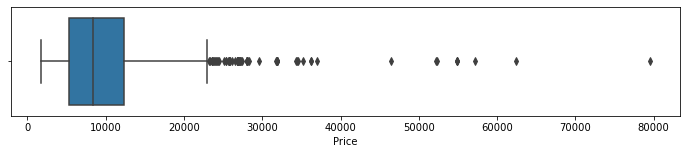

In [199]:
plt.figure(figsize=(12,2))
sns.boxplot('Price',data=train)


c:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

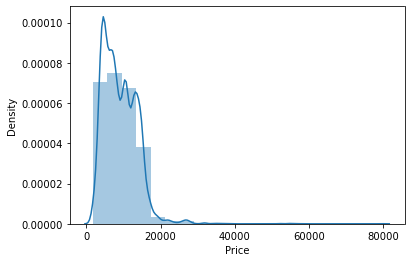

In [200]:
sns.distplot(train["Price"],bins=20)

In [201]:

# dropping outiers rows with Percentiles

uplimit = train['Price'].quantile(0.95)
lowlimit = train['Price'].quantile(0.05)

In [202]:
train[train['Price']>uplimit]

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_Time_Hr,Dep_Time_min,Arrival_Hr,Arrival_min,Dur_hr
7,4,0,5,0,8,22270,1,3,2019,8,0,5,5,21
20,2,2,1,0,8,19495,6,3,2019,14,10,19,20,5
38,4,0,5,0,8,19225,6,3,2019,7,0,13,15,6
56,1,0,5,1,8,17345,1,3,2019,8,50,23,55,15
91,6,2,1,0,8,17057,6,3,2019,2,15,13,20,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10580,4,0,5,0,8,17261,6,3,2019,14,5,9,30,19
10625,4,2,1,1,5,19644,9,5,2019,11,40,19,0,7
10645,6,2,1,0,8,17057,3,3,2019,7,5,15,30,8
10668,4,2,1,1,8,21219,9,5,2019,11,40,19,0,7


In [203]:
train[train['Price']<lowlimit]

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_Time_Hr,Dep_Time_min,Arrival_Hr,Arrival_min,Dur_hr
43,0,0,2,4,8,3383,6,5,2019,11,10,13,55,2
45,8,0,5,4,7,3527,24,3,2019,5,45,8,35,2
79,8,1,4,4,7,3332,21,3,2019,8,20,10,35,2
95,3,1,4,4,8,3540,21,6,2019,5,15,7,40,2
96,8,0,2,4,7,3257,15,5,2019,5,55,8,35,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10609,3,4,3,4,8,2754,12,5,2019,12,0,13,30,1
10617,3,4,3,4,8,2754,27,5,2019,2,35,4,5,1
10671,1,4,3,4,8,3100,6,6,2019,21,5,22,25,1
10675,1,4,3,4,8,3100,9,6,2019,6,20,7,40,1


In [204]:
# better is Outliers using std

In [205]:
# Drop or Cap


# ===> Cap
train.loc[train['Price']>upperLimit,'Price'] = upperLimit

In [206]:
train['Price']

0         3897.0
1         7662.0
2        13882.0
3         6218.0
4        13302.0
          ...   
10678     4107.0
10679     4145.0
10680     7229.0
10681    12648.0
10682    11753.0
Name: Price, Length: 10682, dtype: float64

c:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

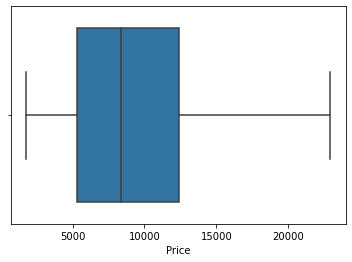

In [207]:
sns.boxplot('Price',data=train)

In [208]:
upperLimit

22918.94982142857

In [209]:
train.Price.max()

22918.94982142857

In [210]:
train[train['Price']==upperLimit]

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_Time_Hr,Dep_Time_min,Arrival_Hr,Arrival_min,Dur_hr
123,1,2,1,0,8,22918.949821,1,3,2019,23,0,19,15,20
396,6,2,1,0,8,22918.949821,1,3,2019,12,50,19,15,6
486,4,0,5,0,8,22918.949821,1,3,2019,8,55,15,15,6
510,4,0,5,0,8,22918.949821,1,3,2019,7,0,12,25,5
597,1,4,3,1,8,22918.949821,6,3,2019,9,40,15,15,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10353,4,4,3,1,8,22918.949821,6,3,2019,19,50,16,50,21
10364,5,0,5,0,3,22918.949821,1,3,2019,9,45,14,25,4
10383,4,0,5,0,8,22918.949821,1,3,2019,7,0,5,5,22
10439,4,0,5,0,8,22918.949821,1,3,2019,18,40,9,0,14


c:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

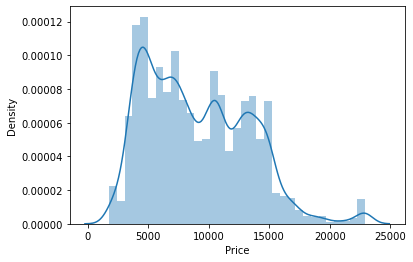

In [211]:
sns.distplot(train["Price"])


In [212]:
from sklearn.preprocessing import StandardScaler         # in real case, dont do this for dependant variable(here Price)
sc=StandardScaler()


updated_train_df=sc.fit_transform(train)


In [213]:
train_scaled = pd.DataFrame(updated_train_df,columns=train.columns)
train_scaled.head()


,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_Time_Hr,Dep_Time_min,Arrival_Hr,Arrival_min,Dur_hr
0,-0.410805,-1.658435,2.416778,1.407223,0.499921,-1.203553,1.237288,-1.467707,0.0,1.654268,-0.234932,-1.800319,-0.889984,-0.970831
1,-1.261152,0.890299,-0.973732,-0.253644,0.499921,-0.319079,-1.475307,0.250153,0.0,-1.303000,1.363674,-0.050813,-0.587017,-0.382238
2,0.014369,0.040721,-0.295630,-0.253644,0.499921,1.142123,-0.531796,1.109082,0.0,-0.607172,0.031502,-1.362943,0.018918,1.030385
3,-0.410805,0.890299,-0.973732,-0.807267,0.499921,-0.658304,-0.177979,0.250153,0.0,0.958440,-1.034235,1.407109,0.321885,-0.617675
4,-0.410805,-1.658435,2.416778,-0.807267,0.499921,1.005869,-1.475307,-1.467707,0.0,0.610527,1.363674,1.115525,0.624852,-0.735394


In [214]:
train_scaled['Airline'].value_counts()

 0.014369    3849
-0.410805    2053
-1.261152    1751
 0.864716    1196
 1.715063     818
 2.565411     479
-1.686326     319
-0.835979     194
 1.289890      13
 0.439542       6
 2.990584       3
 2.140237       1
Name: Airline, dtype: int64

In [243]:
# checking distribution

def histplots(data,columns):
    plt.figure(figsize=(8,25))
    k=1
    for column in columns:
        i = len(columns)
        print('The histogram for the feature',column,'is:')
        plt.subplot(i,1,k)
        plt.hist(data[column])
        k+=1




The histogram for the feature Airline is:
The histogram for the feature Source is:
The histogram for the feature Destination is:
The histogram for the feature Total_Stops is:
The histogram for the feature Additional_Info is:
The histogram for the feature Price is:
The histogram for the feature Date is:
The histogram for the feature Month is:
The histogram for the feature Year is:
The histogram for the feature Dep_Time_Hr is:
The histogram for the feature Dep_Time_min is:
The histogram for the feature Arrival_Hr is:
The histogram for the feature Arrival_min is:
The histogram for the feature Dur_hr is:


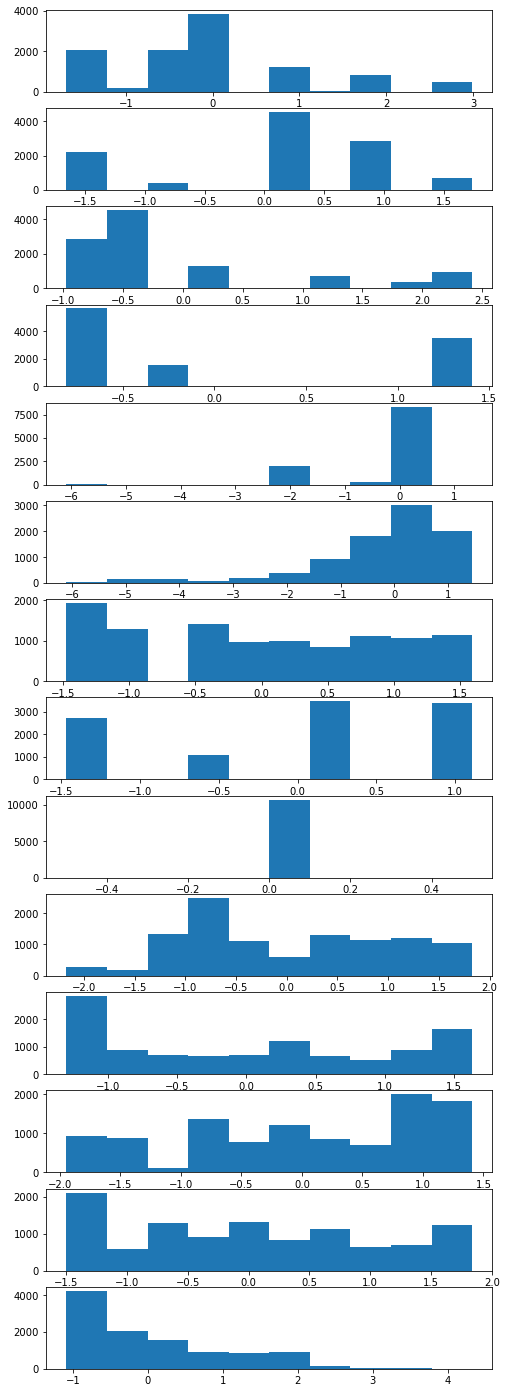

In [244]:
histplots(train_scaled,train_scaled.columns)

In [241]:
# checking distribution

def histplot(data,column):
        print('The histogram for the feature',column,'is:')
        plt.hist(data[column],bins=20)
      


The histogram for the feature Airline is:


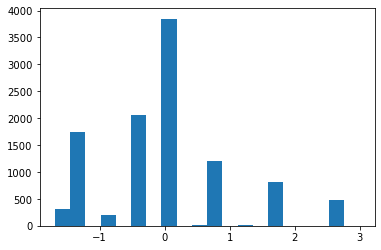

In [242]:
histplot(train_scaled,'Airline')


In [219]:
# histplots(train_scaled,'Source')
# 

In [220]:
# histplots(train_scaled,'Destination')

The histogram for the feature Price is:


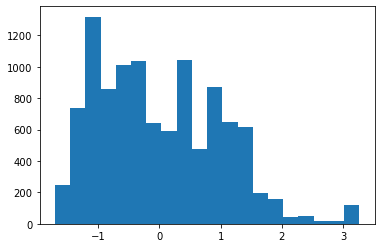

In [221]:
histplots(train_scaled,'Price')

In [222]:
# QQ PLOT


import scipy.stats as stat
import pylab

def plot_data(data,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    data[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(data[feature],dist='norm',plot=pylab)
    plt.show()


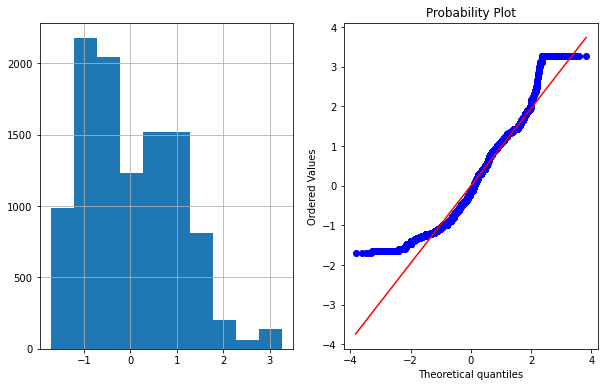

In [223]:
plot_data(train_scaled,'Price')

c:\Users\HP\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 10682 and the array at index 1 has size 1

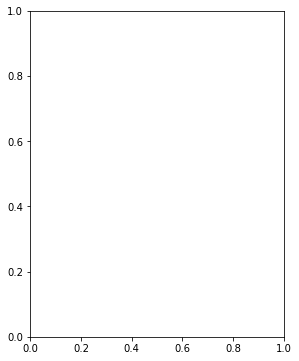

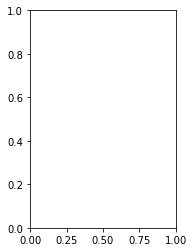

In [224]:
# log transformation

import numpy as np
train_scaled['Price']=np.log1p(train_scaled['Price'])

plot_data(train_scaled,['Price'])      

<AxesSubplot:xlabel='Airline', ylabel='Price'>

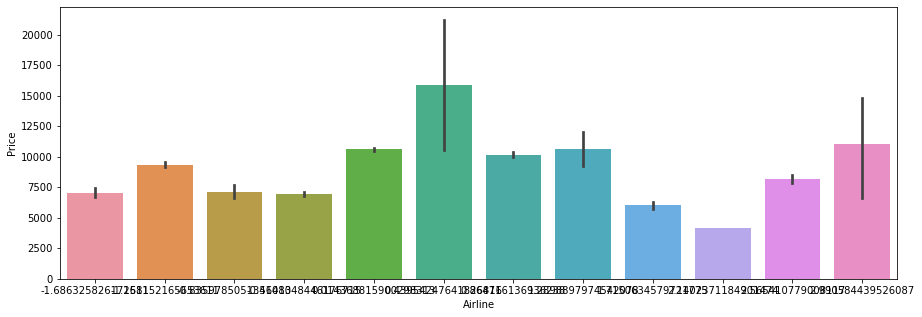

In [230]:
plt.figure(figsize=(15,5))
sns.barplot(x=train_scaled['Airline'],y=train['Price'])